In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression

In [2]:
df=pd.read_csv("bank-full (1).csv",delimiter=";")    #to arrange data into proper form

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df.shape

(45211, 17)

In [5]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df.info()   #as we can se there is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# **Plots of unique values of columns**

(array([ 1336., 11747., 12925.,  8015.,  7066.,  3312.,   377.,   303.,
          116.,    14.]),
 array([18. , 25.7, 33.4, 41.1, 48.8, 56.5, 64.2, 71.9, 79.6, 87.3, 95. ]),
 <BarContainer object of 10 artists>)

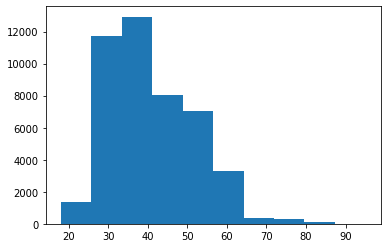

In [7]:
plt.hist(df["age"])  #in data set mostly age are between 25-45

<AxesSubplot:>

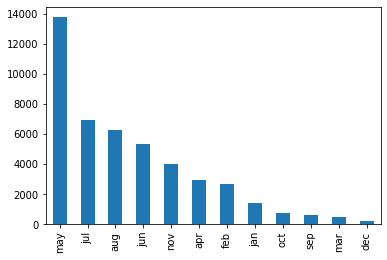

In [8]:
df["month"].value_counts().plot.bar()   # as we see most of last contact of client data from may and lowest at dec

<AxesSubplot:>

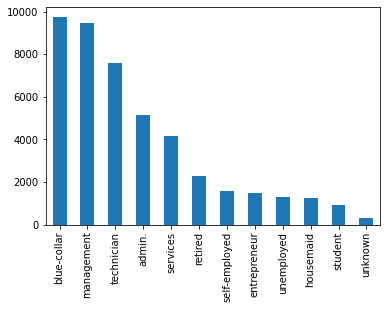

In [9]:
df["job"].value_counts().plot.bar()     # most of clients have from blue_collor, management and tec field

<AxesSubplot:>

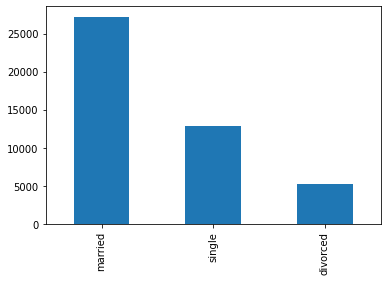

In [10]:
df["marital"].value_counts().plot.bar()    # are most of clients belongs to married cateory

<AxesSubplot:>

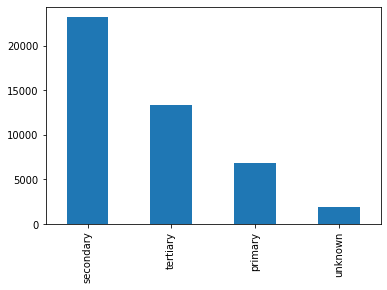

In [11]:
df["education"].value_counts().plot.bar()

<AxesSubplot:>

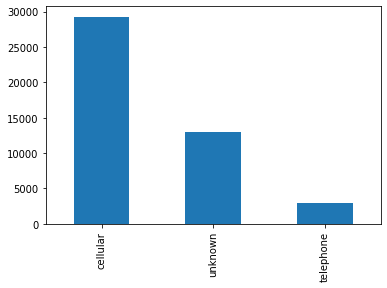

In [12]:
df["contact"].value_counts().plot.bar()

<AxesSubplot:>

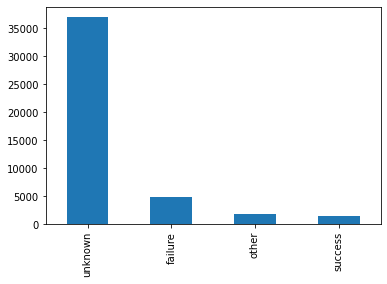

In [13]:
df["poutcome"].value_counts().plot.bar()

In [14]:
num_data = df.select_dtypes(include='number')
num_data.head()



,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


# **Standrdizing a numeric columns from data set**

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dummy = scaler.fit_transform(num_data)
dummyy=pd.DataFrame(dummy,columns=["age","balance","day","duration","campaign","pdays","previous"])
dummyy

,age,balance,day,duration,campaign,pdays,previous
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940
...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940


# **Creating dummies of categorical data**

In [16]:
dummyy2=pd.get_dummies(df,columns=["marital","education","job","month","poutcome","contact"])
dummyy[["marital","education","job","month","poutcome","contact"]]=df[["marital","education","job","month","poutcome","contact"]]
dummyy


,age,balance,day,duration,campaign,pdays,previous,marital,education,job,month,poutcome,contact
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.251940,married,tertiary,management,may,unknown,unknown
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.251940,single,secondary,technician,may,unknown,unknown
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.251940,married,secondary,entrepreneur,may,unknown,unknown
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.251940,married,unknown,blue-collar,may,unknown,unknown
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.251940,single,unknown,unknown,may,unknown,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,0.947747,-0.176460,0.143418,2.791329,0.076230,-0.411453,-0.251940,married,tertiary,technician,nov,unknown,cellular
45207,2.831227,0.120447,0.143418,0.768224,-0.246560,-0.411453,-0.251940,divorced,primary,retired,nov,unknown,cellular
45208,2.925401,1.429593,0.143418,3.373797,0.721811,1.436189,1.050473,married,secondary,retired,nov,success,cellular
45209,1.512791,-0.228024,0.143418,0.970146,0.399020,-0.411453,-0.251940,married,secondary,blue-collar,nov,unknown,telephone


In [17]:
dummyy2.describe()

,age,balance,day,duration,campaign,pdays,previous,marital_divorced,marital_married,marital_single,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,...,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.115171,0.601933,0.282896,...,0.087810,0.016323,0.012807,0.108403,0.040698,0.033421,0.817478,0.647741,0.064276,0.287983
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.319232,0.489505,0.450411,...,0.283022,0.126718,0.112441,0.310892,0.197592,0.179735,0.386278,0.477680,0.245247,0.452828
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**converting binary data into 0 and 1**

In [18]:
df['default']=np.where(df['default'].str.contains("yes"),1,0)
df['housing']=np.where(df['housing'].str.contains("yes"),1,0)
df['loan']=np.where(df['loan'].str.contains("yes"),1,0)
df['y']=np.where(df['y'].str.contains("yes"),1,0)


In [19]:
dummyy[["default","housing","loan","y"]]=df[["default","housing","loan","y"]]
dummyy.head()                    

,age,balance,day,duration,campaign,pdays,previous,marital,education,job,month,poutcome,contact,default,housing,loan,y
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,married,tertiary,management,may,unknown,unknown,0,1,0,0
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,single,secondary,technician,may,unknown,unknown,0,1,0,0
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,married,secondary,entrepreneur,may,unknown,unknown,0,1,1,0
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,married,unknown,blue-collar,may,unknown,unknown,0,1,0,0
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,single,unknown,unknown,may,unknown,unknown,0,0,0,0


In [20]:
dummyy.shape

(45211, 17)

**Creating dummies of categorical columns from data set**

In [21]:
dummyy=pd.get_dummies(dummyy,columns=["marital","education","job","month","poutcome","contact"])


In [22]:
dummyy.shape

(45211, 49)

In [23]:
dummyy.head()

,age,balance,day,duration,campaign,pdays,previous,default,housing,loan,...,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown,contact_cellular,contact_telephone,contact_unknown
0,1.606965,0.256419,-1.298476,0.011016,-0.569351,-0.411453,-0.25194,0,1,0,...,0,0,0,0,0,0,1,0,0,1
1,0.288529,-0.437895,-1.298476,-0.416127,-0.569351,-0.411453,-0.25194,0,1,0,...,0,0,0,0,0,0,1,0,0,1
2,-0.747384,-0.446762,-1.298476,-0.707361,-0.569351,-0.411453,-0.25194,0,1,1,...,0,0,0,0,0,0,1,0,0,1
3,0.571051,0.047205,-1.298476,-0.645231,-0.569351,-0.411453,-0.25194,0,1,0,...,0,0,0,0,0,0,1,0,0,1
4,-0.747384,-0.447091,-1.298476,-0.233620,-0.569351,-0.411453,-0.25194,0,0,0,...,0,0,0,0,0,0,1,0,0,1


In [24]:
dummyy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 49 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  45211 non-null  float64
 1   balance              45211 non-null  float64
 2   day                  45211 non-null  float64
 3   duration             45211 non-null  float64
 4   campaign             45211 non-null  float64
 5   pdays                45211 non-null  float64
 6   previous             45211 non-null  float64
 7   default              45211 non-null  int32  
 8   housing              45211 non-null  int32  
 9   loan                 45211 non-null  int32  
 10  y                    45211 non-null  int32  
 11  marital_divorced     45211 non-null  uint8  
 12  marital_married      45211 non-null  uint8  
 13  marital_single       45211 non-null  uint8  
 14  education_primary    45211 non-null  uint8  
 15  education_secondary  45211 non-null 

**seprating data into x and y**

In [25]:
y=dummyy["y"]

In [26]:
del dummyy["y"]   #deleting y varible from dummy and storing into x
x=dummyy

In [27]:
from sklearn.linear_model import LogisticRegression
cl=LogisticRegression()
cl.fit(x,y)


C:\Users\evilb\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [28]:
predicted_data=cl.predict(x)
predicted_data

array([0, 0, 0, ..., 1, 0, 0])

In [29]:
result= pd.DataFrame({'actual': y,
                         'predicted_prob': cl.predict(x)})
result

,actual,predicted_prob
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
45206,1,1
45207,1,0
45208,1,1
45209,0,0


In [30]:
# Confusion Matrix for the model accuracy
from sklearn.metrics import confusion_matrix
c_m = confusion_matrix(y,predicted_data)
print (c_m)

[[38943   979]
 [ 3458  1831]]


In [31]:
((38943+979)/(38943+979+3458+1831))*100

88.30151954170445

 **As we see accurancy of modle is 89% which is excellent**

Text(0, 0.5, 'True Positive Rate')

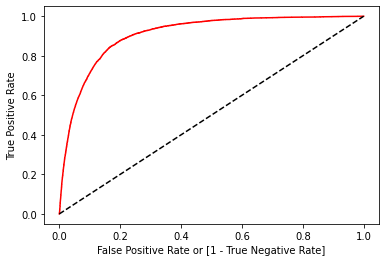

In [32]:
# ROC Curve
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y, cl.predict_proba (x)[:,1])

auc = roc_auc_score(y, predicted_data)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [33]:
auc    #area undr curve

0.6608336932950432